In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [51]:
from scipy.stats import zscore

In [52]:
car_ori = pd.read_csv('train-data.csv', index_col='Unnamed: 0')
car_df = pd.read_csv('car_groups.csv', index_col='Unnamed: 0')
car_df.sample(5)

,Location,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company,Fuel_CNG,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Fuel,Group_3,Group_5
2340,6,2014,97000.0,1,1,22.32,1582.0,126.32,5.0,NaN,8.00,10,0,1,0,0,0,1,0,0
725,6,2016,84000.0,0,1,17.72,1968.0,108.50,5.0,NaN,11.00,25,0,1,0,0,0,1,2,2
2783,3,2014,62497.0,0,1,15.80,1499.0,110.00,5.0,NaN,7.52,8,0,0,0,0,1,4,1,1
5859,6,2016,73053.0,0,1,13.00,2982.0,168.50,7.0,NaN,20.00,28,0,1,0,0,0,1,0,3
5532,3,2011,63991.0,0,1,18.50,1197.0,80.00,5.0,NaN,3.61,10,0,0,0,0,1,4,1,1


In [53]:
car_df.drop(['Fuel', 'New_Price'], axis=1,inplace=True)

In [54]:
scaled_df = car_df.drop(['Group_3', 'Group_5','Price'], axis=1)
scaled_df = scaled_df.apply(zscore)
scaled_df['Group_3'] = car_df['Group_3']
scaled_df['Group_5'] = car_df['Group_5']
scaled_df['Price']= car_df['Price']

In [55]:
scaled_df.sample(5)

,Location,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Company,Fuel_CNG,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Group_3,Group_5,Price
5104,0.466997,-1.027139,0.658467,-0.632529,1.746903,-0.563890,-0.704669,-0.429502,-0.345552,-0.786458,-0.096908,-1.067215,-0.018232,-0.040794,1.091749,1,1,2.69
3101,0.805327,-0.721279,-0.492870,-0.632529,-0.444554,1.141804,-0.266032,-0.934388,-0.345552,0.828119,-0.096908,0.937018,-0.018232,-0.040794,-0.915962,2,2,2.85
3623,-0.209665,-1.944718,-0.144517,-0.632529,-0.444554,0.327503,-1.375132,-1.249708,-0.345552,0.331326,-0.096908,-1.067215,-0.018232,-0.040794,1.091749,1,1,1.75
4495,0.466997,1.419741,0.168111,1.580955,-0.444554,2.423483,-0.621278,-0.734498,-0.345552,0.331326,-0.096908,0.937018,-0.018232,-0.040794,-0.915962,0,0,8.55
2931,0.128666,0.502161,-0.413710,-0.632529,1.746903,-0.082056,-0.704669,-0.491439,-0.345552,-0.786458,-0.096908,-1.067215,-0.018232,-0.040794,1.091749,1,1,4.30


In [57]:
car_base = scaled_df.drop(['Group_3', 'Group_5'], axis=1)
car_g3 = scaled_df.drop([ 'Group_5'], axis=1)
car_g5 = scaled_df.drop(['Group_3'], axis=1)

In [58]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [59]:
rf = RandomForestRegressor(n_estimators=100, random_state=10)

In [60]:
x = car_base.drop('Price', axis=1)
y = car_base['Price']
cv = cross_val_score(rf, x, y, scoring = 'r2', cv=5)
print(cv.mean())
print(cv.std())

0.8715806655056382
0.01900122407809087


In [61]:
rf = RandomForestRegressor(n_estimators=100, random_state=10)
x = car_g3.drop('Price', axis=1)
y = car_g3['Price']
cv = cross_val_score(rf, x, y, scoring = 'r2', cv=5)
print(cv.mean())
print(cv.std())

0.8724526745490853
0.0190348251923221


In [62]:
rf = RandomForestRegressor(n_estimators=100, random_state=10)
x = car_g5.drop(['Price'], axis=1)
y = car_g5['Price']
cv = cross_val_score(rf, x, y, scoring = 'r2', cv=5)
print(cv.mean())
print(cv.std())

0.8732791060915037
0.018793292154071845


In [63]:
rf.fit(x,y)
dat = rf.feature_importances_
imp = pd.Series(data = dat, index=car_g5.drop('Price', axis=1).columns )
imp.nlargest(16)

Power                6.464426e-01
Year                 1.578776e-01
Kilometers_Driven    4.756680e-02
Engine               3.991083e-02
Mileage              2.824465e-02
Company              2.686833e-02
Group_5              2.308093e-02
Location             1.422963e-02
Seats                6.952738e-03
Transmission         3.707270e-03
Owner_Type           1.935631e-03
Fuel_Diesel          1.593792e-03
Fuel_Petrol          1.438671e-03
Fuel_Electric        1.436560e-04
Fuel_CNG             6.468552e-06
Fuel_LPG             3.974671e-07
dtype: float64

In [64]:
## One-Hot Encoding

In [65]:
car_ori['Company'] = car_ori.Name.str.split(' ').str[0] 

In [66]:
car_df['Location'] = car_ori['Location']
car_df['Company'] = car_ori['Company']
car_f = pd.get_dummies(car_df, columns = ['Location', 'Company'] )

In [67]:
car_f.sample(10)

,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_CNG,...,Company_Mitsubishi,Company_Nissan,Company_Porsche,Company_Renault,Company_Skoda,Company_Smart,Company_Tata,Company_Toyota,Company_Volkswagen,Company_Volvo
4510,2014,23000.0,1,1,18.88,1995.0,184.00,5.0,19.90,0,...,0,0,0,0,0,0,0,0,0,0
245,2007,72000.0,0,3,17.00,1086.0,97.70,5.0,0.95,0,...,0,0,0,0,0,0,0,0,0,0
413,2015,41000.0,1,1,21.76,1995.0,190.00,5.0,25.50,0,...,0,0,0,0,0,0,0,0,0,0
4737,2017,38681.0,0,1,13.50,2198.0,157.70,7.0,23.86,0,...,0,0,0,0,0,0,0,0,0,0
3032,2013,65000.0,0,1,23.20,1248.0,73.94,5.0,3.75,0,...,0,0,0,0,0,0,0,0,0,0
5834,2013,250000.0,0,2,12.99,2494.0,100.60,8.0,7.90,0,...,0,0,0,0,0,0,0,1,0,0
3955,2012,100000.0,0,3,11.50,2982.0,171.00,7.0,16.00,0,...,0,0,0,0,0,0,0,1,0,0
3216,2017,32005.0,0,1,18.00,1198.0,86.70,5.0,4.25,0,...,0,0,0,0,0,0,0,0,0,0
2119,2007,1261.0,0,1,19.00,1194.0,94.68,5.0,6.00,0,...,0,0,0,0,0,0,0,0,0,0
4630,2011,82000.0,1,2,12.35,2179.0,187.74,5.0,13.90,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
scaled_df = car_f.drop(['Group_3', 'Group_5','Price'], axis=1)
scaled_df = scaled_df.apply(zscore)
scaled_df['Group_3'] = car_f['Group_3']
scaled_df['Group_5'] = car_f['Group_5']
scaled_df['Price']= car_f['Price']

In [24]:
scaled_df_5 = scaled_df.drop('Group_3', axis=1)

In [70]:
rf = RandomForestRegressor(n_estimators=70, random_state=10)
x = scaled_df_5.drop(['Price'], axis=1)
y = car_g5['Price']
cv = cross_val_score(rf, x, y, scoring = 'r2', cv=5)
print(cv.mean())
print(cv.std())

0.8835525920651147
0.019978325922957525


In [26]:
rf.fit(x,y)
feat_imp_rf =  pd.Series(data = (rf.feature_importances_)*100, index = x.columns)
feat_imp_rf.nlargest(42)

Power                    64.546536
Year                     15.283123
Kilometers_Driven         4.384355
Engine                    3.568759
Mileage                   2.302858
Group_5                   2.228671
Company_Land              1.996187
Seats                     0.676651
Location_Hyderabad        0.627354
Company_Mercedes-Benz     0.542556
Company_Porsche           0.325700
Company_Mini              0.265941
Location_Bangalore        0.211929
Location_Coimbatore       0.209494
Company_Audi              0.199456
Location_Kochi            0.180156
Transmission              0.172543
Location_Mumbai           0.166279
Company_BMW               0.159482
Company_Toyota            0.148639
Location_Delhi            0.131729
Owner_Type                0.129959
Company_Lamborghini       0.128692
Company_Honda             0.123267
Company_Jaguar            0.121410
Location_Chennai          0.117217
Location_Kolkata          0.100088
Company_Hyundai           0.099713
Fuel_Petrol         

In [27]:
# feature selection using mlextend 

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

sfs_rf  =  sfs(rf, k_features=30, scoring='r2', cv=5, n_jobs=-1)
sfs_rf.fit(x, y)
sfs_rf.get_metric_dict()

{1: {'feature_idx': (6,),
  'cv_scores': array([0.70693619, 0.69279727, 0.74723053, 0.73878836, 0.66847037]),
  'avg_score': 0.7108445436109534,
  'feature_names': ('Power',),
  'ci_bound': 0.037434179909762576,
  'std_dev': 0.029125063731921905,
  'std_err': 0.014562531865960952},
 2: {'feature_idx': (0, 6),
  'cv_scores': array([0.86728813, 0.77011529, 0.83336768, 0.81745151, 0.83850781]),
  'avg_score': 0.8253460829244572,
  'feature_names': ('Year', 'Power'),
  'ci_bound': 0.041087019677512285,
  'std_dev': 0.03196709717020389,
  'std_err': 0.015983548585101946},
 3: {'feature_idx': (0, 5, 6),
  'cv_scores': array([0.89377144, 0.79842515, 0.84722874, 0.83671661, 0.86752533]),
  'avg_score': 0.8487334553775089,
  'feature_names': ('Year', 'Engine', 'Power'),
  'ci_bound': 0.04088417083742549,
  'std_dev': 0.03180927388117456,
  'std_err': 0.01590463694058728},
 4: {'feature_idx': (0, 1, 5, 6),
  'cv_scores': array([0.89060322, 0.84564654, 0.8586963 , 0.84562894, 0.85716398]),
  'avg

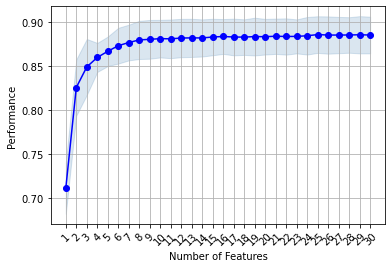

In [28]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig = plot_sfs(sfs_rf.get_metric_dict())
plt.xticks(rotation = 45)
plt.grid()

In [29]:
# Choosing 15 Features and Training the model on these features.

In [71]:
cols = list(sfs_rf.get_metric_dict()[20]['feature_names'])

In [72]:
df = pd.DataFrame()
for c in cols:
    df[c] = scaled_df_5[c]

In [74]:
x = df
y = car_base['Price']
cv = cross_val_score(rf, x, y, scoring = 'r2', cv=5)
print(cv.mean())
print(cv.std())

0.8831178342135046
0.020247969516334594


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                6019 non-null   float64
 1   Kilometers_Driven   6019 non-null   float64
 2   Transmission        6019 non-null   float64
 3   Owner_Type          6019 non-null   float64
 4   Mileage             6019 non-null   float64
 5   Engine              6019 non-null   float64
 6   Power               6019 non-null   float64
 7   Fuel_Petrol         6019 non-null   float64
 8   Location_Ahmedabad  6019 non-null   float64
 9   Location_Chennai    6019 non-null   float64
 10  Location_Hyderabad  6019 non-null   float64
 11  Location_Kolkata    6019 non-null   float64
 12  Company_Audi        6019 non-null   float64
 13  Company_Honda       6019 non-null   float64
 14  Company_Hyundai     6019 non-null   float64
 15  Company_Land        6019 non-null   float64
 16  Compan

In [76]:
from sklearn.preprocessing import PolynomialFeatures

In [110]:
car_df.sample(8)

,Location,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Fuel_CNG,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Group_3,Group_5
1869,Hyderabad,2014,56000.0,0,1,15.00,1598.0,103.52,5.0,7.00,Skoda,0,0,0,0,1,1,1
5964,Mumbai,2018,8000.0,1,1,17.00,1591.0,121.30,5.0,12.85,Hyundai,0,0,0,0,1,1,4
1490,Chennai,2016,55000.0,1,1,17.60,1582.0,126.20,5.0,12.50,Hyundai,0,1,0,0,0,0,0
5927,Coimbatore,2018,29091.0,1,1,13.22,2967.0,241.40,5.0,45.52,Audi,0,1,0,0,0,0,0
3922,Pune,2012,79000.0,0,2,17.92,1086.0,62.10,5.0,1.60,Hyundai,0,0,0,0,1,1,1
2716,Kochi,2015,80064.0,0,1,22.70,1498.0,89.84,5.0,7.33,Ford,0,1,0,0,0,2,2
972,Coimbatore,2014,28246.0,0,2,17.80,1198.0,86.70,5.0,4.94,Honda,0,0,0,0,1,1,1
776,Coimbatore,2014,41016.0,1,2,16.95,1197.0,78.90,5.0,5.08,Hyundai,0,0,0,0,1,1,4


In [ ]:
car_base = car_df.drop(['Price', 'Location'], axis=1)

In [92]:
poly = PolynomialFeatures(degree=2, interaction_only=False)
car_poly = pd.DataFrame(data=poly.fit_transform(car_base))

In [93]:
car_poly

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,1.0,1.143658,-1.027139,0.378422,-0.632529,-0.444554,1.989832,-1.038232,-1.027107,-0.345552,...,1.138948,0.019457,0.043536,0.977528,0.000332,0.000744,0.016699,0.001664,0.037366,0.838986
1,1.0,1.481989,0.502161,-0.440114,-0.632529,-0.444554,0.320276,-0.064226,0.249937,-0.345552,...,0.878003,-0.017083,-0.038225,-0.858273,0.000332,0.000744,0.016699,0.001664,0.037366,0.838986
2,1.0,-1.224657,-0.721279,-0.308092,-0.632529,-0.444554,-0.033873,-0.703001,-0.453901,-0.345552,...,1.138948,0.019457,0.043536,-1.165131,0.000332,0.000744,-0.019904,0.001664,-0.044537,1.191916
3,1.0,-1.224657,-0.415419,0.774488,-0.632529,-0.444554,0.585285,-0.621278,-0.452775,2.143829,...,0.878003,-0.017083,-0.038225,-0.858273,0.000332,0.000744,0.016699,0.001664,0.037366,0.838986
4,1.0,-0.886327,-0.109559,-0.448828,1.580955,1.746903,-0.756624,0.579552,0.523965,-0.345552,...,0.878003,-0.017083,-0.038225,-0.858273,0.000332,0.000744,0.016699,0.001664,0.037366,0.838986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,1.0,-0.547996,0.196301,-0.800138,-0.632529,-0.444554,2.423483,-0.621278,-0.729806,-0.345552,...,0.878003,-0.017083,-0.038225,-0.858273,0.000332,0.000744,0.016699,0.001664,0.037366,0.838986
6015,1.0,0.128666,0.502161,1.117745,-0.632529,-0.444554,1.459814,-0.834759,-0.786113,-0.345552,...,0.878003,-0.017083,-0.038225,-0.858273,0.000332,0.000744,0.016699,0.001664,0.037366,0.838986
6016,1.0,0.128666,-0.415419,-0.070453,-0.632529,1.746903,-1.045725,1.463495,-0.016583,3.388519,...,0.878003,-0.017083,-0.038225,-0.858273,0.000332,0.000744,0.016699,0.001664,0.037366,0.838986
6017,1.0,0.805327,-0.109559,-0.308092,-0.632529,-0.444554,0.134770,-1.038232,-0.859312,-0.345552,...,1.138948,0.019457,0.043536,-1.165131,0.000332,0.000744,-0.019904,0.001664,-0.044537,1.191916


In [94]:
cv = cross_val_score(rf, car_poly, y, scoring = 'r2', cv=5)
print(cv.mean())
print(cv.std())

0.880048133873722
0.021555872503882568


In [104]:
car_lr = car_df.drop(['Location', 'Group_3', 'Group_5'], axis=1)

In [111]:
scaled_df.sample(5)

,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_CNG,Fuel_Diesel,...,Company_Renault,Company_Skoda,Company_Smart,Company_Tata,Company_Toyota,Company_Volkswagen,Company_Volvo,Group_3,Group_5,Price
179,-0.415419,0.800892,-0.632529,-0.444554,1.710368,-1.141637,-1.037618,-0.345552,-0.096908,0.937018,...,-0.157115,-0.172026,-0.012891,-0.178571,-0.270718,-0.234999,-0.059171,2,2,1.50
2041,-0.415419,0.457635,-0.632529,-0.444554,-0.573527,1.505191,-0.953157,2.143829,-0.096908,0.937018,...,-0.157115,-0.172026,-0.012891,-0.178571,-0.270718,-0.234999,-0.059171,0,3,4.30
790,-0.109559,-0.813076,-0.632529,-0.444554,-0.371157,-1.375132,-1.476813,3.388519,-0.096908,-1.067215,...,-0.157115,-0.172026,-0.012891,-0.178571,-0.270718,-0.234999,-0.059171,0,3,2.35
2179,0.502161,-0.202475,1.580955,-0.444554,-0.082056,-0.205991,0.082893,-0.345552,-0.096908,-1.067215,...,-0.157115,-0.172026,-0.012891,-0.178571,-0.270718,-0.234999,-0.059171,1,4,7.41
1811,-0.721279,0.123144,1.580955,-0.444554,-1.599835,1.223329,1.214665,-0.345552,-0.096908,-1.067215,...,-0.157115,-0.172026,-0.012891,-0.178571,-0.270718,-0.234999,-0.059171,1,4,5.89


In [107]:
cv = cross_val_score(rf, scaled_df.drop('Price', axis=1), y, scoring = 'r2', cv=5)
print(cv.mean())
print(cv.std())

0.8793905143877877
0.020959621250845245


In [108]:
from sklearn.linear_model import LinearRegression, LassoCV


In [109]:
lr = LinearRegression()
cv = cross_val_score(lr, car_lr.drop('Price', axis=1), y, scoring = 'r2', cv=5)
print(cv.mean())
print(cv.std())

0.7606528448673914
0.02919390651801284
